Importing Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading Data Set

In [82]:
file = 'Housing.csv'
df = pd.read_csv(file)
print(df.head(3))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  


Input features and target

In [83]:
x_train = df[['area','bedrooms','bathrooms','stories','parking']].values
y_train = df['price'].values
print(x_train,y_train)

[[7420    4    2    3    2]
 [8960    4    4    4    3]
 [9960    3    2    2    2]
 ...
 [3620    2    1    1    0]
 [2910    3    1    1    0]
 [3850    3    1    2    0]] [13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6580000  6510000  6510000  6510000  6475000
  6475000  6440000  644

In [84]:
# Standardization: zero mean, unit variance
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train_scaled = (x_train - x_mean) / x_std


Model

In [85]:
def f_wb(x,w,b):
    return (np.dot(x,w)+b)

Conputing Cost

In [86]:
def compute_cost(x,y,w,b):
    m,n = x.shape
    total_cost = 0
    
    for i in range(m):
        err = f_wb(x[i],w,b)-y[i]
        total_cost += err**2
        
    total_cost /= 2*m
    
    return total_cost

Computing Gradient

In [87]:
def compute_gradient(x,y,w,b):
    m,n = x.shape
    
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = f_wb(x[i],w,b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*x[i,j]
        
        dj_db += err
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw,dj_db

Gradient Decent

In [88]:
def Gradient_decent(x,y,w_in,b_in,alpha,iteration):
    cost_history = []
    w = w_in.copy()
    b = b_in
    
    for i in range(iteration):
        dj_dw ,dj_db = compute_gradient(x,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = compute_cost(x,y,w,b)
        cost_history.append(cost)
        
        
    return w,b,cost_history
        

Training Model

In [89]:
w_init = np.zeros(5)
b_init = 0
alpha = 0.0001
iteration = 20000

w_final,b_final,cost_history = Gradient_decent(x_train_scaled,y_train,w_init,b_init,alpha,iteration)


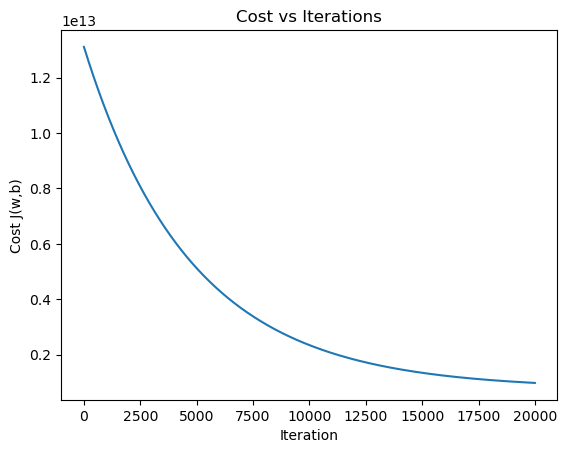

In [90]:
plt.figure()
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Cost vs Iterations")
plt.show()

Final Equation

In [91]:
print(w_final,b_final)

[640454.58329079 209463.71242708 526856.3633741  425270.40410586
 348610.43490844] 4121687.1065962967
